# Kolektor Surface Defect Detection
TMM4128 - Machine Learning for Engineers - Semestral Project


### Import TensorFlow

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
# import pandas as pd
# import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image, ImageFilter 
# import math

In [2]:
import tensorflow as tf
# CUDA check
print("Number of GPUs: ", len(tf.config.list_physical_devices('GPU')))

Number of GPUs:  1


In [3]:
Categories = ["Undamaged", "Damaged"]
data_train = "./datasets/KolektorSDD2/train/"
data_test = "./datasets/KolektorSDD2/test/"
current_directory = os.getcwd()
print(current_directory)

flat_train = []
flat_train_GT = []
flat_test = []
flat_test_GT = []
damage_label_train = []
damage_label_test = []
img_name = []
X_train = []
X_test = []
y_train = []
y_test = []

# Average image size
img_height =  636 #194 # 636 # 388
img_width = 229 # 70 # 229 # 140
img_size = (img_height, img_width)

c:\Users\lukasvi\Documents\GitHub\NTNU-ML-KolektorSDD2


In [4]:
# Create TRAIN DATA

#Create path to folder
path = data_train

list_damaged = []
negative_max = 3000
negative_counter = 0 



#For-loop to go through all the contents in the folder
for img in os.listdir(path):
    #Distinguishing between Groundtruth pictures and Actual pictures
    image_path_GT = os.path.join(path,img)
    image_path = os.path.join(path,img[:5]+".png")

    if "GT" in img:
        img_array = cv2.imread(image_path_GT)
        #If the GT Image is Black, no damage is detected
        if np.all(img_array == 0): # OK
            if negative_counter < negative_max:
                y_train.append(0)
                # img2 = load_img(image_path, target_size = img_size) # load image and resize
                imgPIL = Image.open(image_path)
                imgPIL = imgPIL.resize((img_width, img_height))
                # imgPIL.show("haha")
                imgPIL = imgPIL.filter(ImageFilter.GaussianBlur(1))
                # imgPIL.show("FU")
                
                img_array = img_to_array(imgPIL) # convert image to array
                img_array /= 255.0 # normalizing to scale from 0 to 1
                X_train.append(img_array) # original image
                negative_counter += 1

        else:                   # NOK
            y_train.append(1) # Original image
            list_damaged.append(img)
            # img2 = load_img(image_path, target_size = img_size) # load image and resize
            imgPIL = Image.open(image_path)
            imgPIL = imgPIL.resize((img_width, img_height))
            # imgPIL.show("haha")
            imgPIL = imgPIL.filter(ImageFilter.GaussianBlur(1))
            # imgPIL.show("FU")
            img_array = img_to_array(imgPIL) # convert image to array
            img_array /= 255.0 # normalizing to scale from 0 to 1
            X_train.append(img_array) # original image
print(len(list_damaged))

print(len(X_train), len(y_train))
        
        #Mark GT images, if any defect is on them
    # elif "GT" not in img:
    #     img2 = load_img(os.path.join(path,img), target_size = img_size) # load image and resize
    #     img_array = img_to_array(img2) # convert image to array
    #     img_array /= 255.0 # normalizing to scale from 0 to 1
    #     X_train.append(img_array) # original image

for img_name in list_damaged:
    img_name = img_name[:5] + ".png"
    # img = load_img(os.path.join(path,img_name), target_size = img_size) # load image and resize
    imgPIL = Image.open(os.path.join(path,img_name))
    imgPIL = imgPIL.resize((img_width, img_height))
    # imgPIL.show("haha")
    imgPIL = imgPIL.filter(ImageFilter.GaussianBlur(1))
    # imgPIL.show("FU")
    img_array = img_to_array(imgPIL) # convert image to array
    img_array /= 255.0 # normalizing to scale from 0 to 1
    rotated_image_array = np.rot90(img_array, k=2)
    X_train.append(rotated_image_array) # rotated image
    y_train.append(1)


print(len(X_train), len(y_train))

247
2332 2332
2579 2579


In [5]:
# # Faulty pictures export

# import cv2
# stop_index = 5 # 5 or 8 for GT
# vis = cv2.imread(os.path.join(path,list_damaged[0][:stop_index] + ".png"))
# vis = cv2.resize(vis, (231,636), interpolation = cv2.INTER_LINEAR)

# for i in range(1, 8):
#     img = cv2.imread(os.path.join(path,list_damaged[i][:stop_index] + ".png"))
#     stretch_near = cv2.resize(img, (231,636), interpolation = cv2.INTER_LINEAR)
#     vis = np.concatenate((vis, stretch_near), axis=1)

# vis1 = cv2.imread(os.path.join(path,list_damaged[8][:stop_index] + ".png"))
# vis1 = cv2.resize(vis1, (231,636), interpolation = cv2.INTER_LINEAR)

# for i in range(9, 16):
#     img = cv2.imread(os.path.join(path,list_damaged[i][:stop_index] + ".png"))
#     stretch_near = cv2.resize(img, (231,636), interpolation = cv2.INTER_LINEAR)
#     vis1 = np.concatenate((vis1, stretch_near), axis=1)
# # cv2.imshow('Horizontal', vis)

# visAll = np.concatenate((vis, vis1), axis=0)

# cv2.imwrite('out.png', visAll)

In [6]:
# Create TEST DATA 

#Create path to folder
path = data_test

#For-loop to go through all the contents in the folder
for img in os.listdir(path):
    #Distinguishing between Groundtruth pictures and Actual pictures
    
    if "GT" in img:
        img_array = cv2.imread(os.path.join(path,img))
        #If the GT Image is Black, no damage is detected
        if np.all(img_array == 0):
            y_test.append(0)
        else:
            y_test.append(1)
        #Mark GT images, if any defect is on them
    elif "GT" not in img:
        # img2 = load_img(os.path.join(path,img), target_size = img_size) # load image and resize
        imgPIL = Image.open(os.path.join(path,img))
        imgPIL = imgPIL.resize((img_width, img_height))
        # imgPIL.show("haha")
        imgPIL = imgPIL.filter(ImageFilter.GaussianBlur(1))
        # imgPIL.show("FU")
        img_array = img_to_array(imgPIL) # convert image to array
        img_array /= 255.0 # normalizing to scale from 0 to 1
        X_test.append(img_array)

In [7]:
X_train = np.array(X_train) 
X_test = np.array(X_test) 
y_train = np.array(y_train) 
y_test = np.array(y_test) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2579, 636, 229, 3)
(2579,)
(1004, 636, 229, 3)
(1004,)


In [8]:
# Faulty vs non-faulty images
unique, counts = np.unique(y_train, return_counts=True)
pos = counts[1]
neg = counts[0]
print(dict(zip(unique, counts)))
print("Percentage of faulty images in all train data:", counts[1]/len(y_train)*100, " %")

{0: 2085, 1: 494}
Percentage of faulty images in all train data: 19.15471112834432  %


In [9]:
# Train - Test split

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 4)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)


x_train shape (1805, 636, 229, 3)
x_val shape (774, 636, 229, 3)
y_train shape (1805,)
y_val shape (774,)


In [10]:
unique, counts = np.unique(y_train, return_counts=True)

print(dict(zip(unique, counts)))
print("Percentage of faulty images in train data:", counts[1]/len(y_train)*100, " %")

unique, counts = np.unique(y_val, return_counts=True)

print(dict(zip(unique, counts)))
print("Percentage of faulty images in test data:", counts[1]/len(y_val)*100, " %")

{0: 1447, 1: 358}
Percentage of faulty images in train data: 19.833795013850416  %
{0: 638, 1: 136}
Percentage of faulty images in test data: 17.571059431524546  %


In [11]:
from sklearn.metrics import confusion_matrix
#import itertools

# from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import layers
from keras.optimizers import RMSprop,Adam
#from keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import ReduceLROnPlateau


initial_bias = np.log([pos/neg])
# print(initial_bias)

output_bias = tf.keras.initializers.Constant(initial_bias)


model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (img_height,img_width,3)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# model.add(Conv2D(filters = 64, kernel_size = (5, 5),padding = 'Same', 
#                  activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (5, 5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (5, 5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256, kernel_size = (5, 5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# fully connected
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation = "relu"))

model.add(Dense(1, activation = "sigmoid", bias_initializer=output_bias))




In [12]:
# Define the optimizer
# In neural networks, an optimizer is an algorithm used to adjust the weights and biases 
# of the network during training in order to minimize the loss function and improve the accuracy of the model.

optimizer = Adam(learning_rate=0.001) # , beta_1=0.9, beta_2=0.999

In [13]:
# from keras import backend as K

# def weighted_binary_crossentropy(y_true, y_pred):
#     # Define class weights
#     class_weights = tf.constant([60.0, 40.0])  # adjust according to your dataset

#     # Convert predictions to logits
#     epsilon = tf.convert_to_tensor(K.epsilon(), y_pred.dtype.base_dtype)
#     y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
#     y_pred = tf.math.log(y_pred / (1 - y_pred))

#     # Calculate weighted binary cross-entropy
#     weighted_losses = tf.nn.weighted_cross_entropy_with_logits(logits=y_pred, labels=y_true, pos_weight=class_weights)
    
#     # Return mean loss
#     return tf.reduce_mean(weighted_losses, axis=-1)

# # Compile your model using the custom loss function
# model.compile(optimizer='adam', loss=weighted_binary_crossentropy, metrics=['accuracy'])


In [18]:
# model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

import tensorflow_addons as tfa
# model.compile(optimizer = optimizer , loss = tfa.losses.SigmoidFocalCrossEntropy(), metrics=["accuracy"])
model.compile(optimizer = optimizer , loss = "binary_focal_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 636, 229, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 318, 114, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 318, 114, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 318, 114, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 159, 57, 64)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 159, 57, 64)       0

                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 18,971,617
Trainable params: 18,971,617
Non-trainable params: 0
_________________________________________________________________


In [19]:
epochs = 100  
batch_size = 250

In [20]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15, restore_best_weights=True)

In [21]:
# Lets fit the model

history = model.fit(X_train, 
                    y_train, 
                    epochs = epochs, 
                    validation_data = (X_val, y_val), 
                    steps_per_epoch=X_train.shape[0] // batch_size, 
                    callbacks=[early_stopping]) 

Epoch 1/100
7/7 [==============================] - 9s 1s/step - loss: 0.1755 - accuracy: 0.7474 - val_loss: 0.1812 - val_accuracy: 0.8243
Epoch 2/100
7/7 [==============================] - 8s 1s/step - loss: 0.1563 - accuracy: 0.7972 - val_loss: 0.1188 - val_accuracy: 0.8243
Epoch 3/100
7/7 [==============================] - 7s 1s/step - loss: 0.1293 - accuracy: 0.8006 - val_loss: 0.1266 - val_accuracy: 0.8243
Epoch 4/100
7/7 [==============================] - 7s 1s/step - loss: 0.1256 - accuracy: 0.8066 - val_loss: 0.1247 - val_accuracy: 0.8243
Epoch 5/100
7/7 [==============================] - 7s 1s/step - loss: 0.1227 - accuracy: 0.8061 - val_loss: 0.1262 - val_accuracy: 0.8243
Epoch 6/100
7/7 [==============================] - 8s 1s/step - loss: 0.1196 - accuracy: 0.8227 - val_loss: 0.1185 - val_accuracy: 0.8243
Epoch 7/100
7/7 [==============================] - 8s 1s/step - loss: 0.1140 - accuracy: 0.8294 - val_loss: 0.0985 - val_accuracy: 0.8295
Epoch 8/100
7/7 [=================

In [22]:
print("Accuracy of the model is --> " , model.evaluate(X_val, y_val, batch_size=batch_size)[1]*100 , "%")
print("Loss of the model is --> " , model.evaluate(X_val, y_val, batch_size=batch_size)[0])

4/4 [==============================] - 3s 357ms/step - loss: 0.0616 - accuracy: 0.9289
Accuracy of the model is -->  92.89405941963196 %
4/4 [==============================] - 1s 176ms/step - loss: 0.0616 - accuracy: 0.9289
Loss of the model is -->  0.06159188598394394


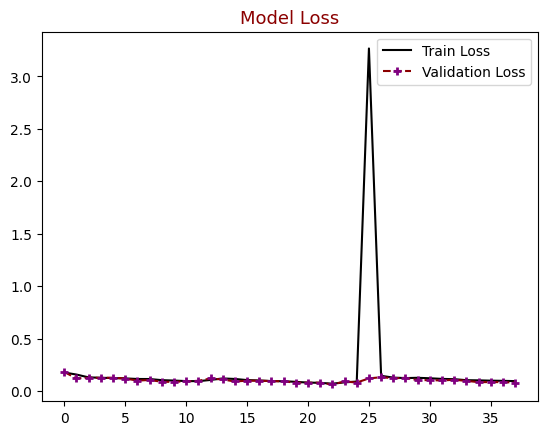

In [23]:
# Model Loss

plt.figure()
plt.plot(history.history["loss"],label = "Train Loss", color = "black")
plt.plot(history.history["val_loss"],label = "Validation Loss", color = "darkred", marker = "+", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

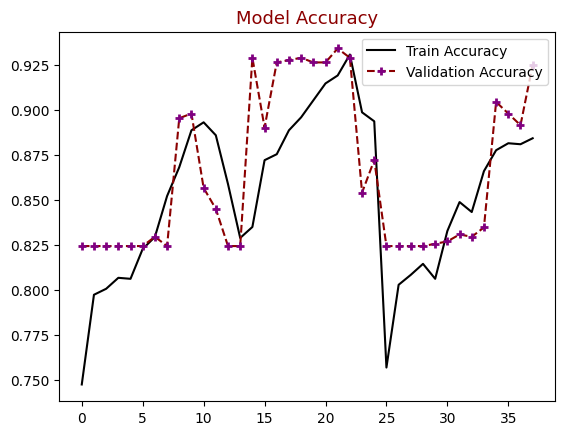

In [24]:
# Model Accuracy 

plt.figure()
plt.plot(history.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", marker = "+", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

In [25]:
Y_predict_test = model.predict(X_test)
print(Y_predict_test)

binary_predictions = (Y_predict_test > 0.5).astype(int)

accuracy = (binary_predictions.flatten() == y_test).mean()
unique, counts = np.unique(y_test, return_counts=True)

print(dict(zip(unique, counts)))
print(894/len(y_test))

print(f"Test accuracy: {accuracy * 100:.2f}%")

32/32 [==============================] - 2s 47ms/step
[[0.18893825]
 [0.25718188]
 [0.25044626]
 ...
 [0.23165241]
 [0.24831127]
 [0.25570545]]
{0: 894, 1: 110}
0.8904382470119522
Test accuracy: 92.23%


Test accuracy: 89.34 %

Test accuracy: 92.13 % (I don't know what changed, only the image size... 636x229)

90.74 % with initial bias

89.94 % with 1000/500, size image down 

25/25 [==============================] - 1s 37ms/step


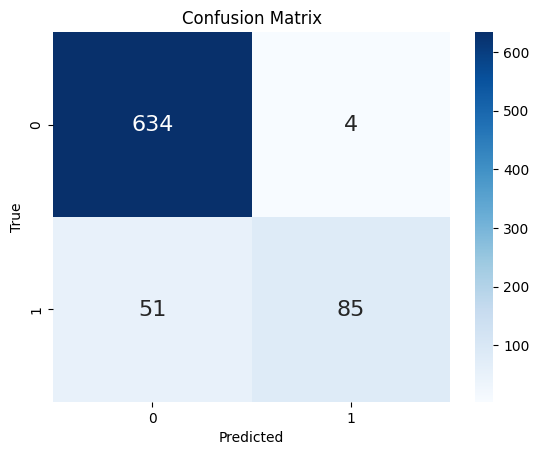

Accuracy: 92.89%
Precision: 0.9551
Recall: 0.6250
F1 Score: 0.7556


In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have 'test_labels' and 'binary_predictions'
# test_labels: True labels for the test set
# binary_predictions: Predictions made by the model (0 or 1)

Y_pred = model.predict(X_val)
Y_pred_bin_list = []
for val in Y_pred:
    if val > 0.5:
        Y_pred_bin_list.append(1)
    else:
        Y_pred_bin_list.append(0)
Y_pred_bin = np.array(Y_pred_bin_list)
#print(Y_pred_bin)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, Y_pred_bin)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Additional metrics
accuracy = accuracy_score(y_val, Y_pred_bin)
precision = precision_score(y_val, Y_pred_bin)
recall = recall_score(y_val, Y_pred_bin)
f1 = f1_score(y_val, Y_pred_bin)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

32/32 [==============================] - 1s 36ms/step


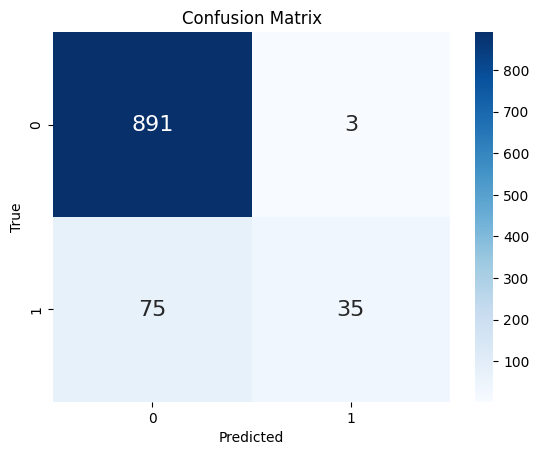

Accuracy: 92.23%
Precision: 0.9211
Recall: 0.3182
F1 Score: 0.4730


In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have 'test_labels' and 'binary_predictions'
# test_labels: True labels for the test set
# binary_predictions: Predictions made by the model (0 or 1)

Y_pred = model.predict(X_test)
Y_pred_bin_list = []
for val in Y_pred:
    if val > 0.5:
        Y_pred_bin_list.append(1)
    else:
        Y_pred_bin_list.append(0)
Y_pred_bin = np.array(Y_pred_bin_list)
# print(Y_pred_bin)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred_bin)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Additional metrics
accuracy = accuracy_score(y_test, Y_pred_bin)
precision = precision_score(y_test, Y_pred_bin)
recall = recall_score(y_test, Y_pred_bin)
f1 = f1_score(y_test, Y_pred_bin)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")